In [1]:
import numpy as np
import matplotlib.pyplot as plt
from algorithms import *
from gridworld import GridWorld
ALG_NAMES = ['Sarsa',
             'Q-learning',
             'Sarsa-lambda',
             'Q-lambda']

In [2]:
def plot_ep_step(episodes1, label1=None, episodes2=None, label2=None, episodes3=None, label3=None, title=None):
    eps_1 = []
    for i, ep in enumerate(episodes1):
        for _ in ep:
            eps_1.append(i)
    plt.xlabel('Number of steps')
    plt.ylabel('Episode')
    if title is not None:
        plt.title(title)
    plt.plot(eps_1, label = label1)
    
    if episodes2 is not None:
        eps_2 = []
        for i, ep in enumerate(episodes2):
            for _ in ep:
                eps_2.append(i)
    plt.plot(eps_2, label = label2)            
    
    if episodes3 is not None:
        eps_3 = []
        for i, ep in enumerate(episodes3):
            for _ in ep:
                eps_3.append(i)
    plt.plot(eps_3, label = label3)       
    
    plt.legend()

In [3]:
def plot_step_per_ep(episodes1, label1=None, episodes2=None, label2=None, episodes3=None, label3=None, title=None):
    step1 = []
    for ep in episodes1:
        step1.append(len(ep))    
    plt.xlabel('Episode')
    plt.ylabel('Number of steps')
    if title is not None:
        plt.title(title)
    plt.plot(step1, label = label1)
    if episodes2 is not None:
        step2 = []
        for ep in episodes2:
            step2.append(len(ep))
        plt.plot(step2, label = label2)
    if episodes3 is not None:
        step3 = []
        for ep in episodes3:
            step3.append(len(ep))
        plt.plot(step3, label = label3)   
    plt.legend()

# Regular Gridworld

## Sarsa

In [4]:
env = GridWorld(stochastic_wind=False, print_board=False)
algorithm = ALG_NAMES[0]
num_episodes = 300
alpha = 0.5
epsilon = 0.1
gamma = 1
lam = 0.5

In [5]:
alpha = (0.5, 0.8, 1)
eps = []
for i in range(3):
    rl = Sarsa(env=env, alpha=alpha[i], epsilon=epsilon, gamma=gamma, table_init='zeros')
    eps.append(rl.train(num_episodes))

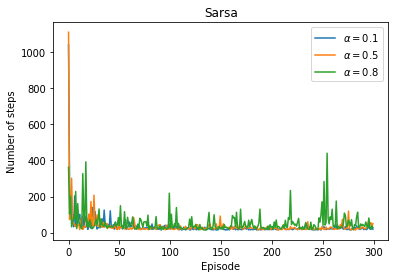

In [6]:
plot_step_per_ep(eps[0], '$\\alpha=0.1$',eps[1], '$\\alpha=0.5$',eps[2], '$\\alpha=0.8$', 'Sarsa')

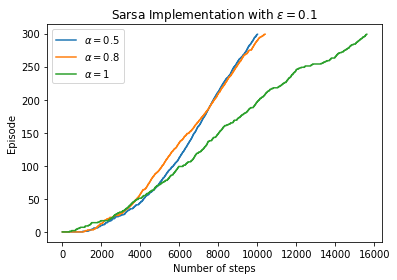

In [7]:
plot_ep_step(eps[0], '$\\alpha=0.5$',eps[1], '$\\alpha=0.8$',eps[2], '$\\alpha=1$', 'Sarsa Implementation with $\epsilon = 0.1$')

In [8]:
epsilon = (0.1, 0.2, 0.4)
alpha = 0.5
eps = []
for i in range(3):
    rl = Sarsa(env=env, alpha=alpha, epsilon=epsilon[i], gamma=gamma, table_init='zeros')
    eps.append(rl.train(num_episodes))

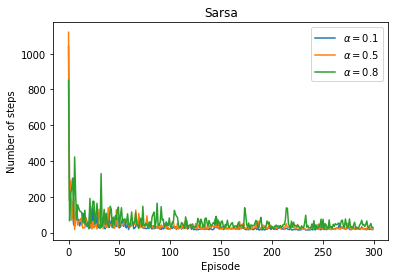

In [9]:
plot_step_per_ep(eps[0], '$\\alpha=0.1$',eps[1], '$\\alpha=0.5$',eps[2], '$\\alpha=0.8$', 'Sarsa')

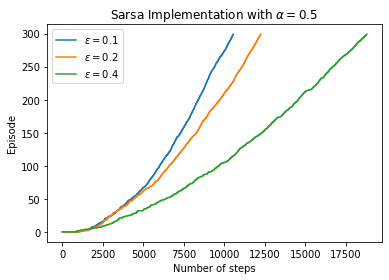

In [10]:
plot_ep_step(eps[0], '$\epsilon=0.1$',eps[1], '$\\epsilon=0.2$',eps[2], '$\\epsilon=0.4$', 'Sarsa Implementation with $\\alpha = 0.5$')

## Q-learning

In [53]:
env = GridWorld(stochastic_wind=False, print_board=False)
algorithm = ALG_NAMES[1]
num_episodes = 300
alpha = 0.5
epsilon = 0.1
gamma = 1
lam = 0.5

In [54]:
alpha = (0.5, 0.8, 1)
eps = []
for i in range(3):
    rl = QLearning(env=env, alpha=alpha[i], epsilon=epsilon, gamma=gamma, table_init='zeros')
    eps.append(rl.train(num_episodes))

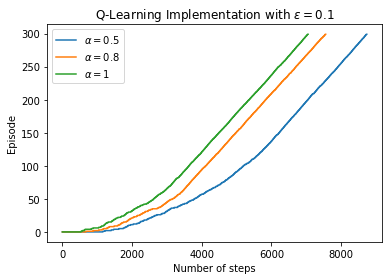

In [55]:
plot_ep_step(eps[0], '$\\alpha=0.5$',eps[1], '$\\alpha=0.8$',eps[2], '$\\alpha=1$', 'Q-Learning Implementation with $\epsilon = 0.1$')

## Sarsa-Lambda

In [120]:
env = GridWorld(stochastic_wind=False, print_board=False)
algorithm = ALG_NAMES[1]
num_episodes = 300
alpha = 0.5
epsilon = 0.1
gamma = 1
lam = 0.5

In [121]:
alpha = (0.2, 0.5, 0.8)
eps = []
for i in range(3):
    rl = SarsaLambda(trace_decay=0.8, env=env, alpha=alpha[i], epsilon=epsilon, gamma=gamma, table_init='zeros')
    eps.append(rl.train(num_episodes))

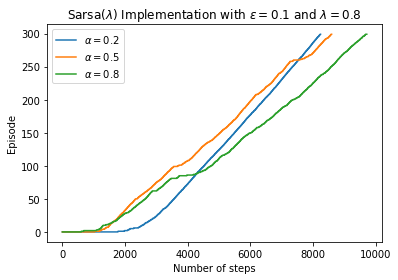

In [122]:
plot_ep_step(eps[0], '$\\alpha=0.2$',eps[1], '$\\alpha=0.5$',eps[2], '$\\alpha=0.8$', 'Sarsa($\lambda$) Implementation with $\epsilon = 0.1$ and $\lambda= 0.8$')

In [145]:
env = GridWorld(stochastic_wind=False, print_board=False)
algorithm = ALG_NAMES[1]
num_episodes = 300
alpha = 0.5
epsilon = 0.1
gamma = 1
lam = 0.5

In [146]:
trace = (0.1, 0.5, 0.9)
eps = []
for i in range(3):
    rl = SarsaLambda(trace_decay=trace[i], env=env, alpha=0.5, epsilon=epsilon, gamma=gamma, table_init='zeros')
    eps.append(rl.train(num_episodes))

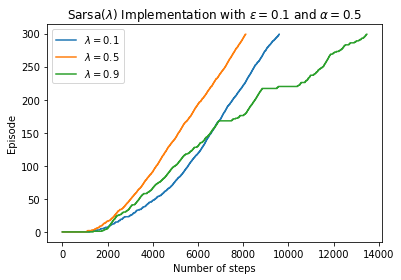

In [147]:
plot_ep_step(eps[0], '$\lambda=0.1$',eps[1], '$\lambda=0.5$',eps[2], '$\lambda=0.9$', 'Sarsa($\lambda$) Implementation with $\epsilon = 0.1$ and $\\alpha= 0.5$')

## Q-Lambda

In [138]:
env = GridWorld(stochastic_wind=False, print_board=False)
num_episodes = 300
alpha = 0.5
epsilon = 0.1
gamma = 1
lam = 0.5

In [139]:
alpha = (0.2, 0.5, 0.8)
eps = []
for i in range(3):
    rl = QLambda(trace_decay=0.8, env=env, alpha=alpha[i], epsilon=epsilon, gamma=gamma, table_init='zeros')
    eps.append(rl.train(num_episodes))

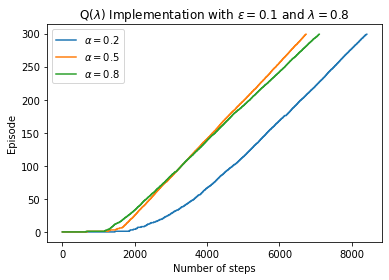

In [140]:
plot_ep_step(eps[0], '$\\alpha=0.2$',eps[1], '$\\alpha=0.5$',eps[2], '$\\alpha=0.8$', 'Q($\lambda$) Implementation with $\epsilon = 0.1$ and $\lambda= 0.8$')

In [141]:
env = GridWorld(stochastic_wind=False, print_board=False)
algorithm = ALG_NAMES[1]
num_episodes = 300
alpha = 0.5
epsilon = 0.1
gamma = 1
lam = 0.5

In [142]:
trace = (0.1, 0.5, 0.9)
eps = []
for i in range(3):
    rl = QLambda(trace_decay=trace[i], env=env, alpha=0.5, epsilon=epsilon, gamma=gamma, table_init='zeros')
    eps.append(rl.train(num_episodes))

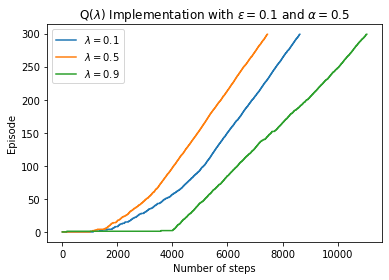

In [143]:
plot_ep_step(eps[0], '$\lambda=0.1$',eps[1], '$\lambda=0.5$',eps[2], '$\lambda=0.9$', 'Q($\lambda$) Implementation with $\epsilon = 0.1$ and $\\alpha= 0.5$')

# Compare

In [151]:
env = GridWorld(stochastic_wind=False, print_board=False)
algorithm = ALG_NAMES[1]
num_episodes = 300
alpha = 0.5
epsilon = 0.1
gamma = 1
lam = 0.5

In [152]:
sarsa = Sarsa(env=env, alpha=0.5, epsilon=epsilon, gamma=gamma, table_init='zeros')
slambda = SarsaLambda(trace_decay=0.5, env=env, alpha=0.5, epsilon=epsilon, gamma=gamma, table_init='zeros')
qlambda = QLambda(trace_decay=0.5, env=env, alpha=0.5, epsilon=epsilon, gamma=gamma, table_init='zeros')
eps[0] = sarsa.train(num_episodes)
eps[1] = slambda.train(num_episodes)
eps[2] = qlambda.train(num_episodes)

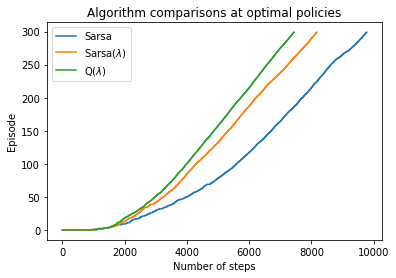

In [156]:
plot_ep_step(eps[0], 'Sarsa',eps[1], 'Sarsa($\lambda$)',eps[2], 'Q($\lambda$)','Algorithm comparisons with optimal par')